In [17]:
%matplotlib inline
from linescanning import dataset,utils, plotting
import matplotlib.pyplot as plt
import os
opj = os.path.join

In [56]:
fprep_dir = "/data1/projects/MicroFunc/Jurjen/projects/WB-pRF/derivatives/fmriprep/sub-008/ses-1/func"
pybest_dir = "/data1/projects/MicroFunc/Jurjen/projects/WB-pRF/derivatives/pybest/sub-008/ses-1"

fprep_files = utils.get_file_from_substring(['hemi-L', 'space-fsnative', 'gii'], fprep_dir)
pybest_raw = utils.get_file_from_substring(['hemi-L', 'space-fsnative', 'run-', 'denoised_bold.npy'], opj(pybest_dir, 'denoising'))
pybest_zscore = utils.get_file_from_substring(['hemi-L', 'space-fsnative', 'run-', 'denoised_bold.npy'], opj(pybest_dir, 'unzscored'))
orig_pybest = utils.get_file_from_substring(['hemi-L', 'space-fsnative', 'run-', 'denoised_bold.npy'], "/data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/pybest/sub-008/ses-1/denoising")
orig_fprep = utils.get_file_from_substring(['hemi-L', 'space-fsnative', 'gii'], "/data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/fmriprep/sub-008/ses-1/func")
print(fprep_files, '\n')
print(pybest_raw, '\n')
print(pybest_zscore, '\n')
print(orig_pybest, '\n')
print(orig_fprep, '\n')

['/data1/projects/MicroFunc/Jurjen/projects/WB-pRF/derivatives/fmriprep/sub-008/ses-1/func/sub-008_ses-1_task-2R_run-1_hemi-L_space-fsnative_bold.func.gii', '/data1/projects/MicroFunc/Jurjen/projects/WB-pRF/derivatives/fmriprep/sub-008/ses-1/func/sub-008_ses-1_task-2R_run-2_hemi-L_space-fsnative_bold.func.gii', '/data1/projects/MicroFunc/Jurjen/projects/WB-pRF/derivatives/fmriprep/sub-008/ses-1/func/sub-008_ses-1_task-2R_run-3_hemi-L_space-fsnative_bold.func.gii', '/data1/projects/MicroFunc/Jurjen/projects/WB-pRF/derivatives/fmriprep/sub-008/ses-1/func/sub-008_ses-1_task-2R_run-4_hemi-L_space-fsnative_bold.func.gii', '/data1/projects/MicroFunc/Jurjen/projects/WB-pRF/derivatives/fmriprep/sub-008/ses-1/func/sub-008_ses-1_task-2R_run-5_hemi-L_space-fsnative_bold.func.gii', '/data1/projects/MicroFunc/Jurjen/projects/WB-pRF/derivatives/fmriprep/sub-008/ses-1/func/sub-008_ses-1_task-2R_run-6_hemi-L_space-fsnative_bold.func.gii'] 

['/data1/projects/MicroFunc/Jurjen/projects/WB-pRF/derivative

In [51]:
fprep_obj = dataset.Dataset(fprep_files, use_bids=True, filter_strategy="raw", standardization="raw")
zscore_obj = dataset.Dataset(pybest_raw, use_bids=True, filter_strategy="raw", standardization="raw", transpose=True)
unzscore_obj = dataset.Dataset(pybest_zscore, use_bids=True, filter_strategy="raw", standardization="raw", transpose=True)
orig_obj = dataset.Dataset(orig_pybest, use_bids=True, filter_strategy="raw", standardization="raw", transpose=True)

In [61]:
orig2_obj = dataset.Dataset(orig_fprep, use_bids=True, filter_strategy="raw", standardization="raw")

In [62]:
fprep_median = fprep_obj.fetch_fmri().groupby(['subject','t']).median()
zscore_median = zscore_obj.fetch_fmri().groupby(['subject','t']).median()
unzscore_median = unzscore_obj.fetch_fmri().groupby(['subject','t']).median()
orig_median = orig_obj.fetch_fmri().groupby(['subject','t']).median()
orig2_median = orig2_obj.fetch_fmri().groupby(['subject','t']).median()

In [63]:
orig2_median

vox 0         vox 1         vox 2         vox 3  \
subject t                                                                
008     0.000   57560.539062  55479.976562  54247.460938  59615.234375   
        0.105   56855.105469  55235.789062  53849.187500  59378.703125   
        0.210   57174.726562  55384.562500  53642.214844  59299.945312   
        0.315   56693.578125  55293.503906  53713.457031  59265.203125   
        0.420   56666.007812  54681.648438  53452.242188  59082.195312   
...                      ...           ...           ...           ...   
        23.100  57319.109375  55762.312500  54700.523438  58871.257812   
        23.205  57829.320312  55844.382812  54502.890625  59929.535156   
        23.310  57758.675781  55914.062500  54397.398438  59422.781250   
        23.415  57276.898438  55481.937500  54795.937500  59918.468750   
        23.520  57481.085938  55690.296875  54395.765625  59685.300781   

                       vox 4         vox 5         vox 6         vox 7  \
subject t                                                                
008     0.000   58529.156250  54006.023438  52145.832031  58102.148438   
        0.105   57475.140625  53431.816406  52031.476562  57837.457031   
        0.210   57224.238281  53342.070312  51603.257812  57931.914062   
        0.315   57302.230469  53049.714844  51447.851562  57671.484375   
        0.420   57103.812500  53017.511719  51414.914062  57743.898438   
...                      ...           ...           ...           ...   
        23.100  58051.304688  53350.160156  52097.140625  57209.453125   
        23.205  57932.488281  53256.886719  52312.218750  58222.832031   
        23.310  58369.304688  53349.968750  52250.128906  57958.585938   
        23.415  58476.179688  53936.859375  52391.296875  58564.632812   
        23.520  57834.496094  53540.320312  52580.390625  57842.851562   

                       vox 8         vox 9  ...    vox 235186    vox 235187  \
subject t                                   ...                               
008     0.000   56885.746094  54667.812500  ...  21009.478516  29686.687500   
        0.105   56421.218750  54301.984375  ...  20548.640625  28209.830078   
        0.210   56729.343750  54363.312500  ...  20520.601562  28665.656250   
        0.315   56354.554688  54220.597656  ...  20304.574219  28144.574219   
        0.420   56173.031250  53926.601562  ...  20709.468750  28330.832031   
...                      ...           ...  ...           ...           ...   
        23.100  55866.023438  53686.015625  ...  20179.675781  27901.130859   
        23.205  56755.546875  53977.125000  ...  19670.000000  27674.015625   
        23.310  56647.941406  54524.445312  ...  20407.269531  28985.906250   
        23.415  56873.921875  54554.699219  ...  20016.259766  28011.839844   
        23.520  56357.855469  54080.859375  ...  19943.351562  28088.369141   

                 vox 235188  vox 235189  vox 235190  vox 235191  vox 235192  \
subject t                                                                     
008     0.000   1374.345459   24.467386         0.0         0.0         0.0   
        0.105   1519.713745   29.086178         0.0         0.0         0.0   
        0.210   1404.868896   24.295940         0.0         0.0         0.0   
        0.315   1370.455688   24.370346         0.0         0.0         0.0   
        0.420   1393.551514   26.741760         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
        23.100  1698.523438   32.977440         0.0         0.0         0.0   
        23.205  1445.367432   32.091759         0.0         0.0         0.0   
        23.310  1328.325195   24.470400         0.0         0.0         0.0   
        23.415  1578.660889   31.559513         0.0         0.0         0.0   
        23.520  1551.262573   33.053600         0.0         0.0         0.0   

                vox 235193  vox 235194  v

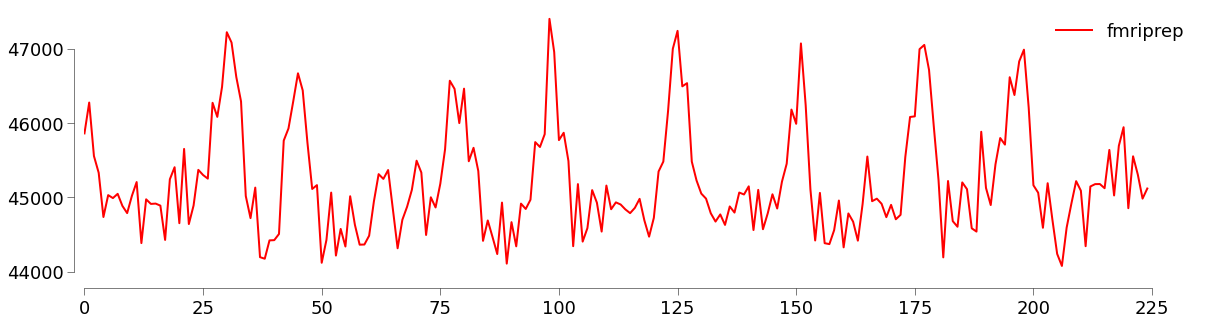

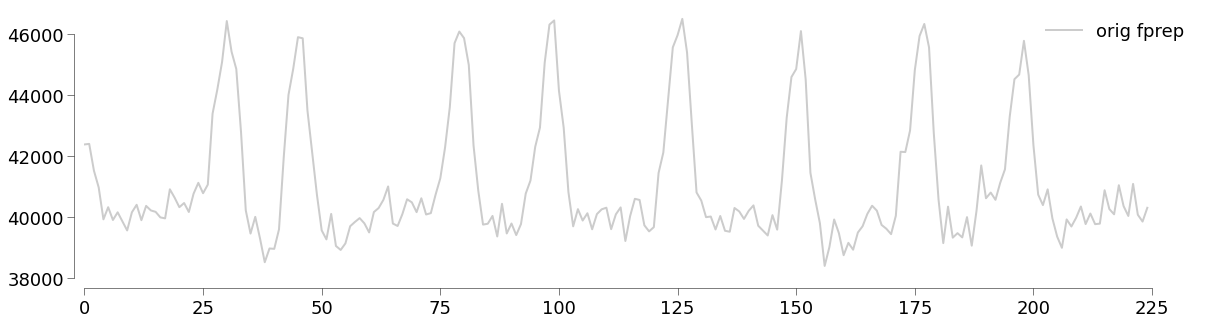

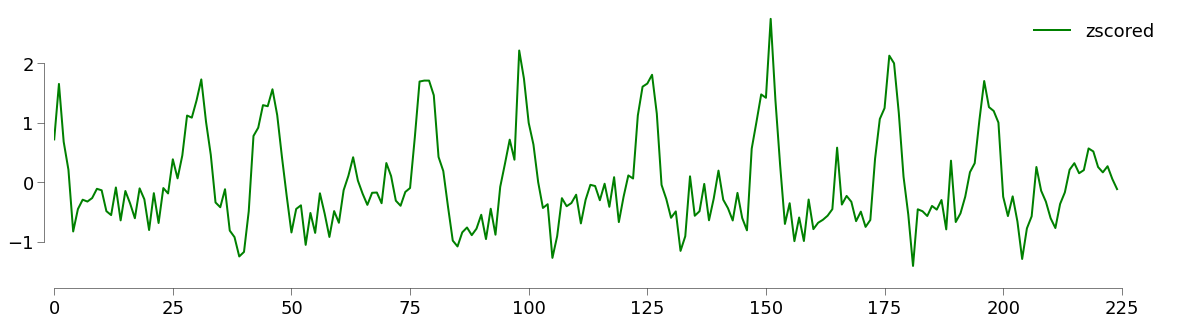

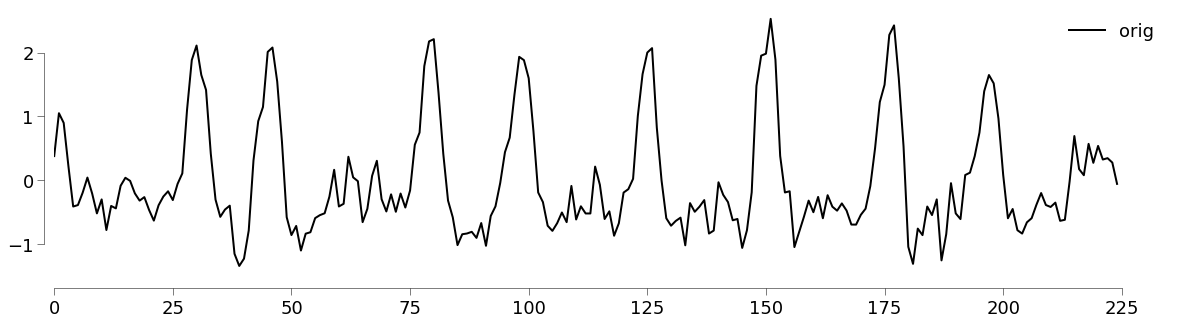

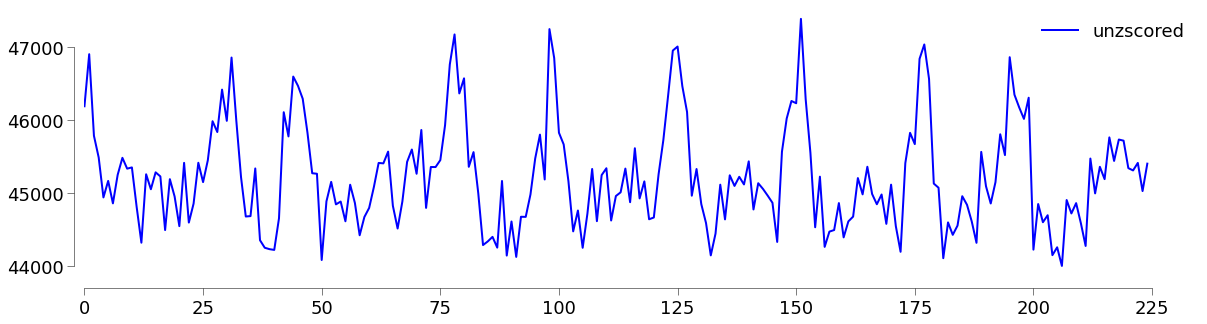

In [64]:
plotting.LazyPlot([fprep_median.values[:,10009]], color=["r"], line_width=[2], labels=['fmriprep'], label_size=18, figsize=(20,5))
plotting.LazyPlot([orig2_median.values[:,10009]], color=["#cccccc"], line_width=[2], labels=['orig fprep'], label_size=18, figsize=(20,5))
plotting.LazyPlot([zscore_median.values[:,10009]], color=["g"], line_width=[2], labels=['zscored'], label_size=18, figsize=(20,5))
plotting.LazyPlot([orig_median.values[:,10009]], color=["k"], line_width=[2], labels=['orig'], label_size=18, figsize=(20,5))
plotting.LazyPlot([unzscore_median.values[:,10009]], color=["b"], line_width=[2], labels=['unzscored'], label_size=18, figsize=(20,5))

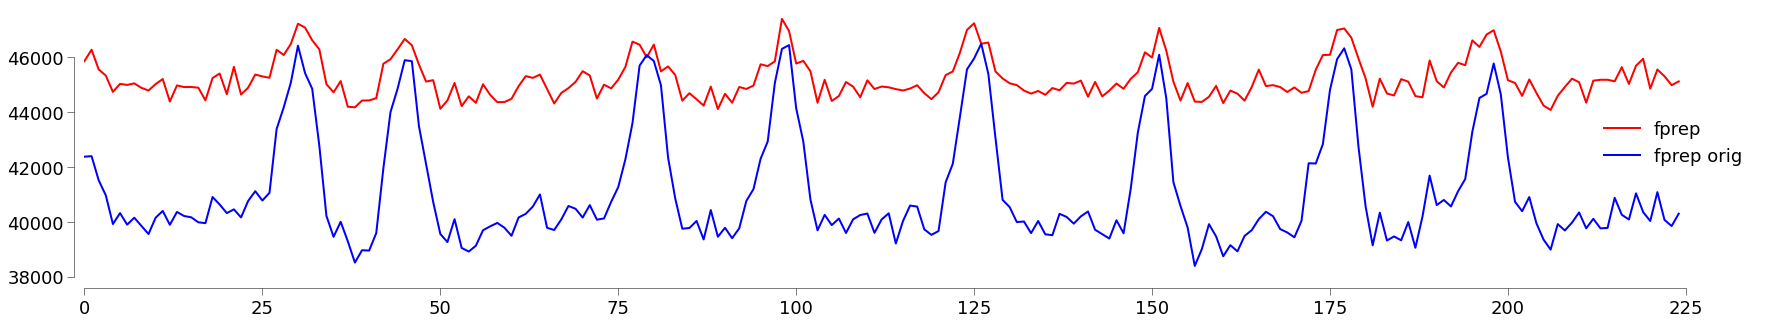

In [65]:
plotting.LazyPlot([fprep_median.values[:,10009], orig2_median.values[:,10009]], color=["r","b"], line_width=2, labels=['fprep', 'fprep orig'], label_size=18)


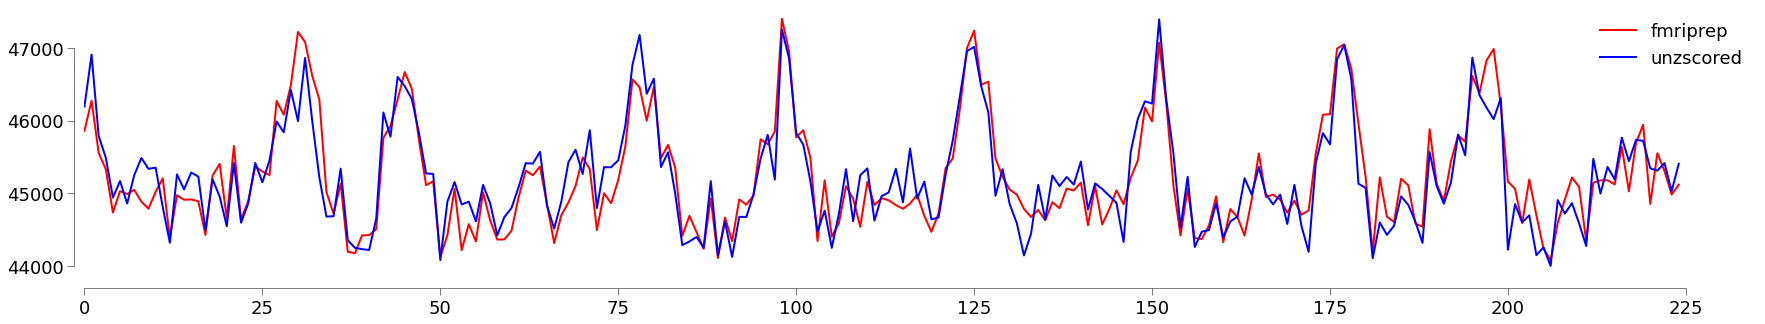

In [43]:
plotting.LazyPlot([fprep_median.values[:,10009], unzscore_median.values[:,10009]], color=["r","b"], line_width=2, labels=['fmriprep', 'unzscored'], label_size=18)
